# Duboke neuronske mreže 

<center><img src="Images/V4_banner.png" width="700" height="700"/></center>

Dubokom neuronskom mrežom smatra se neuronska mreža koja ima više skrivenih slojeva povezanih u nizu. Drugim riječima ova neuronska mreža ima izrazito veliki broj parametara koji se nerijetko broji u milijunima. No za početak, potrebno je proučiti što se dešava kada neuronska mreža ima više ulaznih i više izlaznih podataka.

---

## Više ulaznih neurona

Neuronska mreža tipično nema samo jedan ulazni podataka već više njih. Ulazni podatak također može biti složen poput teksta ili slike te zahtjeva poseban pristup prilikom obrade -- ali o tome će biti više riječi u idućim vježbama.

U prethodnoj vježbi potrebno je bilo modificirati **dataloader** kako bi mogao učitati više podataka. Idući programski kod implementira učitavanja i vraćanje dvije ulazne i jedne izlazne varijable za skup podataka **bike_rental**.

---

<font color='green'>
    
## Primjer

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Poručite navedeni programski kod i iznesite ključna zapažanja.

---


In [1]:
# Autoreload
%load_ext autoreload
%autoreload 2

# Pokretanje skripte 
from Skripte.Vjezba4.dataloader import inspect_dataset
inspect_dataset("Skripte/Vjezba3/day_bikes_rental.csv")

Label      Udio     Missing        Vrijednosti(5)
*****************************************************************
instant: 731 / 731 (missing: 0) (Vales: [1 2 3 4 5])
dteday: 731 / 731 (missing: 0) (Vales: ['2011-01-01' '2011-01-02' '2011-01-03' '2011-01-04' '2011-01-05'])
season: 731 / 731 (missing: 0) (Vales: [1 2 3 4])
yr: 731 / 731 (missing: 0) (Vales: [0 1])
mnth: 731 / 731 (missing: 0) (Vales: [1 2 3 4 5])
holiday: 731 / 731 (missing: 0) (Vales: [0 1])
weekday: 731 / 731 (missing: 0) (Vales: [6 0 1 2 3])
workingday: 731 / 731 (missing: 0) (Vales: [0 1])
weathersit: 731 / 731 (missing: 0) (Vales: [2 1 3])
temp: 731 / 731 (missing: 0) (Vales: [0.344167 0.363478 0.196364 0.2      0.226957])
atemp: 731 / 731 (missing: 0) (Vales: [0.363625 0.353739 0.189405 0.212122 0.22927 ])
hum: 731 / 731 (missing: 0) (Vales: [0.805833 0.696087 0.437273 0.590435 0.436957])
windspeed: 731 / 731 (missing: 0) (Vales: [0.160446 0.248539 0.248309 0.160296 0.1869  ])
casual: 731 / 731 (missing: 0) (Val

In [2]:
# Učitavanje knjižnice
from Skripte.Vjezba4.dataloader import bikeRentalDatasetTwoInputs, ordinary_dataloader

# Dataset
_dataset = bikeRentalDatasetTwoInputs(path_to_csv = "Skripte/Vjezba4/day_bikes_rental.csv",
                                      input_label1 = "season",
                                      input_label2 = "temp",
                                      target_label = "cnt")

# Dataloader
_dataloader = ordinary_dataloader(dataset = _dataset,
                                  batch_size = 1)

# Iterirajmo kroz nekliko podataka
for _i, _item in enumerate(_dataloader):
    print(_item)
    if _i == 10:
        break

[tensor([[1.]]), tensor([[0.3442]]), tensor([985.])]
[tensor([[1.]]), tensor([[0.3635]]), tensor([801.])]
[tensor([[1.]]), tensor([[0.1964]]), tensor([1349.])]
[tensor([[1.]]), tensor([[0.2000]]), tensor([1562.])]
[tensor([[1.]]), tensor([[0.2270]]), tensor([1600.])]
[tensor([[1.]]), tensor([[0.2043]]), tensor([1606.])]
[tensor([[1.]]), tensor([[0.1965]]), tensor([1510.])]
[tensor([[1.]]), tensor([[0.1650]]), tensor([959.])]
[tensor([[1.]]), tensor([[0.1383]]), tensor([822.])]
[tensor([[1.]]), tensor([[0.1508]]), tensor([1321.])]
[tensor([[1.]]), tensor([[0.1691]]), tensor([1263.])]


---

## Izgradnja modela sa dvije ulazne varijable

<font color='green'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>


Model sa dvije ulazne varijable, dakle $x_1$ i $x_2$, sa tri skrivena neurona i jednim izlaznim neuronom ima puno više parametara od modela sa jednom ulaznom varijablom. 

Vaš je zadatak implementirati model **model_2_3_1**  koristeći prethodno dani opis modela sa dva ulazna neurona/podatka, tri skrivena neurona te jednim izlaznim neuronom. Predložak modela implementiran je u skripti *model_2d.py*. Nakon implementacije odgovorite na sljedeća pitanja:

* Koliko se povećava kompleksnost model - odnosno koliko parametara ima model?
* Nakon što ste implementirali model, proučite kako se generira 2D izlazni prostor. Koje zaključke možete donjeti?
* Vježbajte skiciranje izlaznog prostora za dani skup značajki.


In [5]:
# Učitavanje knjižnice
import numpy as np
from sklearn.metrics import mean_squared_error
from Skripte.Vjezba4.dataloader import bikeRentalDatasetTwoInputs, ordinary_dataloader
from Skripte.Vjezba4.model_2d_rj import model_2_3_1, plot_graph, print_model_summary

In [6]:
# Dataset
_dataset = bikeRentalDatasetTwoInputs(path_to_csv = "Skripte/Vjezba4/day_bikes_rental.csv",
                                      input_label1 = "season",
                                      input_label2 = "temp",
                                      target_label = "cnt",
                                      normalizacija = True)

# Dataloader
_dataloader = ordinary_dataloader(dataset = _dataset,
                                  batch_size = 1)

# Model
## Postavljanje parametara
_theta_init = np.array([[0.0, 1.0, 2.5],
                       [0.5, 2.0, 1.5],
                       [-0.3, -1.0, 0.3]], dtype=float)  

_psi_init   = np.array([1.0, 0.8, -0.2, 0.5], dtype=float) 

## Inicijalizacija modela
_model = model_2_3_1(theta_init_matrix = _theta_init,
                     psi_init_matrix = _psi_init,
                     activation_function = "relu")

# Iterirajmo kroz nekliko podataka i snimimo rezultate
_ground_truth = []
_predictions = []
for _i, _item in enumerate(_dataloader):
    _x1, _x2, _y = _item
    # predikcija
    _y_hat = _model(_x1, _x2)

    # Snimanje
    _ground_truth.append(_y.detach().cpu().item())
    _predictions.append(_y_hat.detach().cpu().item())

    # Results
    print(f"x1:{_x1}, x2:{_x2}, y:{_y}, y_hat:{_y_hat}")
    
    # Early stop
    if _i == 10: break

# MSE, ukoliko je dobro implementirano mora biti 
_mse = mean_squared_error(_predictions, _ground_truth)
print("-----------------------------------------------")
print(f"Calculated MSE:{_mse}, expected MSE: 1.2073869")

x1:tensor([[0.]]), x2:tensor([[0.3552]]), y:tensor([0.1108]), y_hat:tensor([[1.5038]], grad_fn=<AddBackward0>)
x1:tensor([[0.]]), x2:tensor([[0.3792]]), y:tensor([0.0896]), y_hat:tensor([[1.5447]], grad_fn=<AddBackward0>)
x1:tensor([[0.]]), x2:tensor([[0.1710]]), y:tensor([0.1527]), y_hat:tensor([[1.1907]], grad_fn=<AddBackward0>)
x1:tensor([[0.]]), x2:tensor([[0.1755]]), y:tensor([0.1772]), y_hat:tensor([[1.1984]], grad_fn=<AddBackward0>)
x1:tensor([[0.]]), x2:tensor([[0.2091]]), y:tensor([0.1815]), y_hat:tensor([[1.2555]], grad_fn=<AddBackward0>)
x1:tensor([[0.]]), x2:tensor([[0.1809]]), y:tensor([0.1822]), y_hat:tensor([[1.2076]], grad_fn=<AddBackward0>)
x1:tensor([[0.]]), x2:tensor([[0.1712]]), y:tensor([0.1712]), y_hat:tensor([[1.1910]], grad_fn=<AddBackward0>)
x1:tensor([[0.]]), x2:tensor([[0.1319]]), y:tensor([0.1078]), y_hat:tensor([[1.1243]], grad_fn=<AddBackward0>)
x1:tensor([[0.]]), x2:tensor([[0.0987]]), y:tensor([0.0920]), y_hat:tensor([[1.0678]], grad_fn=<AddBackward0>)
x

In [7]:
# Ispis osnovnog opisa modela (inspekcija broja parametara)
print_model_summary(model = _model,
                   device = "cpu",
                   input_dim = [(1,), (1,)])

Layer (type (var_name))                  Input Shape      Output Shape     Param #          Trainable
model_2_3_1 (model_2_3_1)                [1]              [1]              13               True
├─ReLU (activation1)                     [1]              [1]              --               --
├─ReLU (activation2)                     [1]              [1]              --               --
├─ReLU (activation3)                     [1]              [1]              --               --
Total params: 13
Trainable params: 13
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

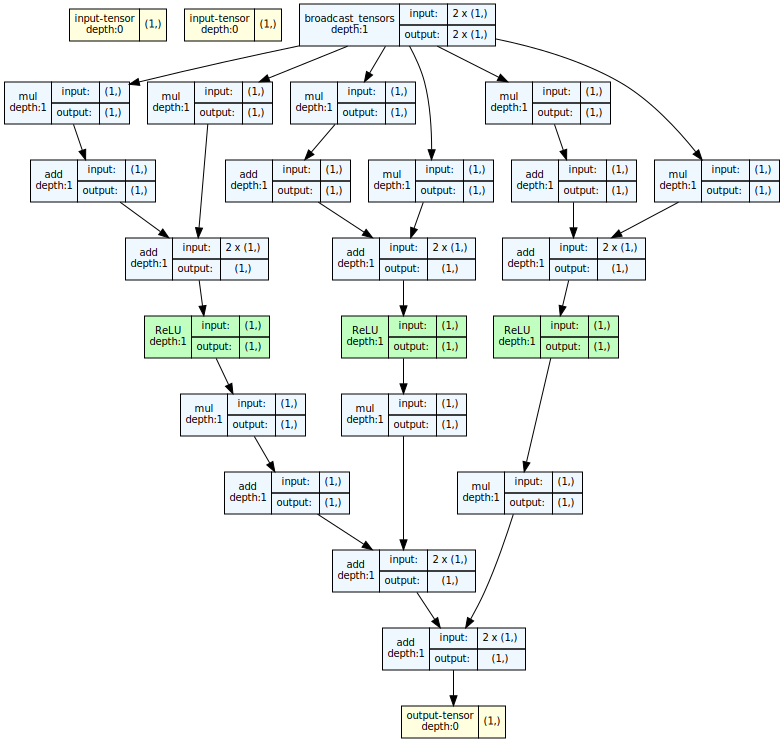

In [9]:
# Iscrtavanje grafa modela (inspekcija povezanosti slojeva)
plot_graph(model = _model,
           device = "cpu",
           input_dim = [(1,), (1,)])

---

In [10]:
# Učitavanje knjižnice
from Skripte.Vjezba4.plot import create_model_2_3_1_component_plots_widget
create_model_2_3_1_component_plots_widget(device = "cpu")

/home/franko/Desktop/Nastava2025_2026/StrojnoUčenje/SDSR-StrojnoUcenje/Notebooks/Skripte/Vjezba4


---
---

## Izgradnja modela sa dvije izlazne varijable

<font color='green'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>


Model sa jednom ulaznom varijablom, sa tri skrivena neurona i dvama izlaznim neuronima($y_1 i y_2$), ima više parametara od modela sa jednom ulaznom varijablom i jednom izlaznom varijablom. 

Vaš je zadatak implementirati model **model_1_3_2**  koristeći prethodno dani opis modela sa dva ulazna neurona/podatka, tri skrivena neurona te jednim izlaznim neuronom. Predložak modela implementiran je u skripti *model_2d.py*. Nakon implementacije odgovorite na sljedeća pitanja:

* Koliko se povećava kompleksnost model - odnosno koliko parametara ima model?
* Nakon što ste implementirali model, proučite [to je izlaz navedenog modela. Koje zaključke možete donjeti?
* Vježbajte skiciranje izlaznog prostora za dani skup značajki.
* Koji sve parametri utječu na izlaz neuronske mreže.

In [12]:
# Učitavanje knjižnice
import numpy as np
from sklearn.metrics import mean_squared_error
from Skripte.Vjezba4.dataloader import bikeRentalDatasetTwoOutputs, ordinary_dataloader
from Skripte.Vjezba4.model_2d_rj import model_1_3_2, plot_graph, print_model_summary

In [13]:
# Dataset
_dataset = bikeRentalDatasetTwoOutputs(path_to_csv = "Skripte/Vjezba4/day_bikes_rental.csv",
                                       input_label = "temp",
                                       target_label1 = "casual",
                                       target_label2 = "registered",
                                       normalizacija = True)

# Dataloader
_dataloader = ordinary_dataloader(dataset = _dataset,
                                  batch_size = 1)

# Model
## Postavljanje parametara
_theta_init = np.array([[0.0, 1.0],
                       [0.5, 2.0],
                       [-0.3, -1.0]], dtype=float)

_psi_init   = np.array([[1.0, 0.8, -0.2, 0.5], 
                        [2.0, -0.8, 0.1, 1.2]], dtype=float)

## Inicijalizacija modela
_model = model_1_3_2(theta_init_matrix = _theta_init,
                     psi_init_matrix = _psi_init,
                     activation_function = "relu")

# Iterirajmo kroz nekliko podataka i snimimo rezultate
_ground_truth1 = []
_ground_truth2 = []
_predictions1 = []
_predictions2 = []
for _i, _item in enumerate(_dataloader):
    _x, _y1, _y2 = _item
    # predikcija
    _y_hat1,_y_hat2 = _model((_x,))

    # Snimanje
    _ground_truth1.append(_y1.detach().cpu().item())
    _ground_truth2.append(_y2.detach().cpu().item())
    _predictions1.append(_y_hat1.detach().cpu().item())
    _predictions2.append(_y_hat2.detach().cpu().item())

    # Results        print("TU", _y1, _y2)

    print(f"x:{_x}, y:{_y1}, y:{_y2}, y_hat_1:{_y_hat1}, y_hat_2:{_y_hat2}")
    
    # Early stop
    if _i == 10: break

# MSE, ukoliko je dobro implementirano mora biti prema zadanim brojevima
_mse1 = mean_squared_error(_predictions1, _ground_truth1)
_mse2 = mean_squared_error(_predictions2, _ground_truth2)

print("-----------------------------------------------")
print(f"Calculated MSE1:{_mse1}, expected MSE: 0.6694325,\nCalculated MSE1:{_mse2}, expected MSE: 3.14305520")

x:tensor([[0.3552]]), y:tensor([[0.0915]]), y:tensor([0.0915]), y_hat_1:tensor([1.0421], grad_fn=<AddBackward0>), y_hat_2:tensor([1.8369], grad_fn=<AddBackward0>)
x:tensor([[0.3792]]), y:tensor([[0.0938]]), y:tensor([0.0938]), y_hat_1:tensor([1.0517], grad_fn=<AddBackward0>), y_hat_2:tensor([1.8225], grad_fn=<AddBackward0>)
x:tensor([[0.1710]]), y:tensor([[0.1746]]), y:tensor([0.1746]), y_hat_1:tensor([0.9684], grad_fn=<AddBackward0>), y_hat_2:tensor([1.9474], grad_fn=<AddBackward0>)
x:tensor([[0.1755]]), y:tensor([[0.2070]]), y:tensor([0.2070]), y_hat_1:tensor([0.9702], grad_fn=<AddBackward0>), y_hat_2:tensor([1.9447], grad_fn=<AddBackward0>)
x:tensor([[0.2091]]), y:tensor([[0.2163]]), y:tensor([0.2163]), y_hat_1:tensor([0.9836], grad_fn=<AddBackward0>), y_hat_2:tensor([1.9245], grad_fn=<AddBackward0>)
x:tensor([[0.1809]]), y:tensor([[0.2163]]), y:tensor([0.2163]), y_hat_1:tensor([0.9724], grad_fn=<AddBackward0>), y_hat_2:tensor([1.9414], grad_fn=<AddBackward0>)
x:tensor([[0.1712]]), 

In [14]:
# Ispis osnovnog opisa modela (inspekcija broja parametara)
print_model_summary(model = _model,
                   device = "cpu",
                   input_dim = (1,))

Layer (type (var_name))                  Input Shape      Output Shape     Param #          Trainable
model_1_3_2 (model_1_3_2)                [1]              [1]              14               True
├─ReLU (activation1)                     [1]              [1]              --               --
├─ReLU (activation2)                     [1]              [1]              --               --
├─ReLU (activation3)                     [1]              [1]              --               --
Total params: 14
Trainable params: 14
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

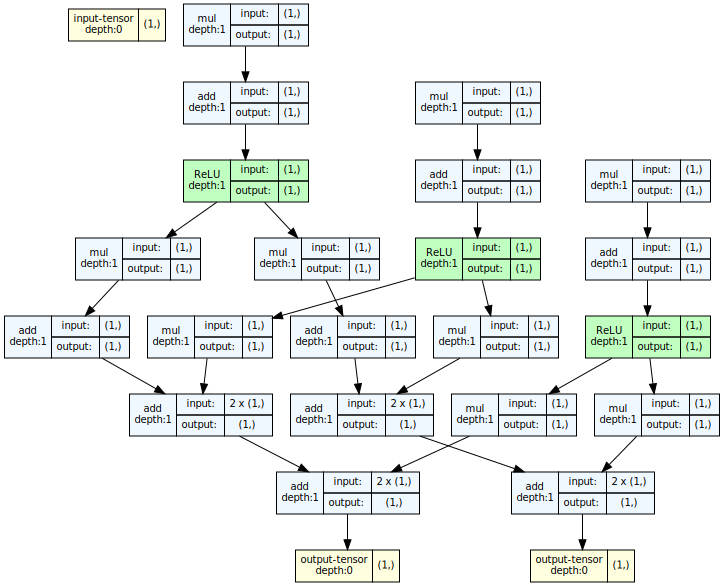

In [15]:
# Iscrtavanje grafa modela (inspekcija povezanosti slojeva)
plot_graph(model = _model,
           device = "cpu",
           input_dim = (1,))

In [16]:
# Učitavanje knjižnice
from Skripte.Vjezba4.plot import create_model_1_3_2_component_plots_widget
create_model_1_3_2_component_plots_widget(device = "cpu")


---

## Broj regija i broj parametara neuronske mreže

Svaka neuronska mreža, kako je do sada prikazano, ima svojstvo da opisuje određni dio prostora. Koliko kompleksno neuoronska mreža može opisati prostor uvelike ovisi o broju parametara što je direktno povezano sa brojem neurona u neuronskoj mreži. Tako se za neuronsku mrežu sa $D_i$ ulaznih neurona i sa $D$ skrivenih neurona kao što je prikazano na sljedećo slici vrijedi sljedeći izračun (Zaslavskyeva formula) za broj regija:

\begin{equation}N = \sum_{j=0}^{D_{i}}\binom{D}{j}=\sum_{j=0}^{D_{i}} \frac{D!}{(D-j)!j!} \end{equation} 

Te izračun za broj parametara:

\begin{equation} N = (D_{i}+1) \cdot D + D + 1 \end{equation} 


<center><img src="Images/V4_NN.png" width="350" height="350"/></center>

---

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Implementirajte funkcije koja će za dani broj ulaznih neurona, skrivenih neurona i jednog izlaznog neurona računati broj regija i parametara.
Funkcije za crtanje će skicirati broj regija i parametara na grafu koristeći implementirane funkcije. Funkcije je potrebno implementirati u skripti **Skripte.Vjezba4.broj_regija_i_parametara.py** prema danim predlošcima.

Odgovorite na pitanja:

* Iznesite zaključke o relaciji parametara $D_i$ i $D$ u odnosu na broj regija.
* Kako su korelirani broj parametara i broj regija.
* Kako $D_i$ a kako $D$ utječe na broj parametara.
* Izračunajte na papiru broj regija i parametara za sljedeće vrijednosti (rezultate provjerite pomoću implementiranih funckija):

  * $D_i = 1$, $D = 3$,
  * $D_i = 2$, $D = 3$,
  * $D_i = 2$, $D = 5$,
  * $D_i = 10$, $D = 3$,
  * $D_i = 3$, $D = 10$
  


In [18]:
# Knjižnice
from Skripte.Vjezba4.broj_regija_i_parametara_rj import broj_regija, broj_parametara, create_regions_widget_D, create_regions_widget_Di
create_regions_widget_D()

In [19]:
create_regions_widget_Di()

---

## Kompozicija neuronskih mreža

Do sada su svi primjeri imali jednostavne neuronske mreže koje su se sastojale od ulaznog sloja, skrivenog sloja te izlaznog sloja. Da bi neuronska mreža postala dubokom, potrebno je da se sastoji od više skrivenih slojeva. Kako bi dobili intuiciju, prikazati će se najjednostavnija kompozicija neuronskih mreža u kojoj prva neuronska mreža ima jedan izlaz koji je ujedno i ulaz u drugu neurosnku mrežu. Proučite sljedeću sliku:


<center><img src="Images/V4_NN2.png" width="500" height="500"/></center>

---

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Idući programski kod definira dvije neuronske mreže $net_1$ i $net_2$ te od njih radi kompoziciju, kao što je prikazano na slici. Vaš je zadatak proučiti kako se formira konačni izlaz te samostalno nacrtati izlaz kompozitne neuronske mreže. Implementirano je nekoliko verzija neuronskih mreža te slobodno eksperimentirajte sa različitima.

In [1]:
from Skripte.Vjezba4.plot import create_model_1_3_1_presets_widget
create_model_1_3_1_presets_widget()

/home/franko/Desktop/Nastava2025_2026/StrojnoUčenje/SDSR-StrojnoUcenje/Notebooks/Skripte/Vjezba4


---

## MLP - Multi-Layer Perceptron

Na poslijetku, kombinacijom kompozicije neuronskih mreža i prethodno viđenih neuronskih mreža dobivamo MLP - Multi Layer Perceptron oblika kao na slici:

<center><img src="Images/V4_NN3.png" width="500" height="500"/></center>

---


<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

U skripti **Skripte/Vjezba4/mlp.py** implementiran je MLP sa slike koristeći PyTorch *Linear* funkciju i *Sequntial* kao omotač. Proučite na internetu što rade navedene funkcije te implemntirajte identičnu neuronsku mrežu koristeći funkcije u prethodnim primjerima. Dobivene neuronske mreže usporedite pomoću *print_model_summary* i *plot_graph funkcija*.

In [21]:
# Učitavanje knjižica
from Skripte.Vjezba4.mlp import MLP_1_3_3_1
from Skripte.Vjezba4.model_2d import plot_graph, print_model_summary

In [22]:
_model = MLP_1_3_3_1()

In [23]:
# Ispis osnovnog opisa modela (inspekcija broja parametara)
print_model_summary(model = _model,
                   device = "cpu",
                   input_dim = (1,))

Layer (type (var_name))                  Input Shape      Output Shape     Param #          Trainable
MLP_1_3_3_1 (MLP_1_3_3_1)                [1]              [1]              --               True
├─Sequential (model)                     [1]              [1]              --               True
│    └─Linear (0)                        [1]              [3]              6                True
│    └─ReLU (1)                          [3]              [3]              --               --
│    └─Linear (2)                        [3]              [3]              12               True
│    └─ReLU (3)                          [3]              [3]              --               --
│    └─Linear (4)                        [3]              [1]              4                True
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

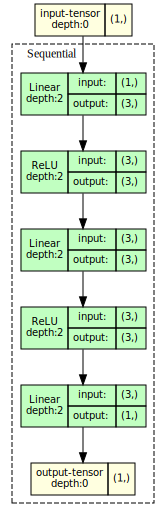

In [24]:
# Iscrtavanje grafa modela (inspekcija povezanosti slojeva)
plot_graph(model = _model,
           device = "cpu",
           input_dim = (1,))